In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
from load_mnist_1 import *


In [2]:

# https://betweenandbetwixt.com/2019/01/04/convolutional-neural-network-with-keras-mnist/
from keras.layers import Dense,GlobalAveragePooling2D
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam, SGD, Adadelta


from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.layers import Dense, Conv2D, Activation, Flatten, MaxPool2D, BatchNormalization
from keras.models import Sequential

from keras.utils import to_categorical


/data/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.regularizers import l2




In [4]:
print("loaded data set from mnist_1 method")
print("introduce regulisation")
# https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/


loaded data set from mnist_1 method
introduce regulisation


In [5]:
train_images, train_labels = load_images_train()
train_labels_str = image_class_to_str(train_labels)

test_images, test_labels = load_images_test()
test_lables_str = image_class_to_str(test_labels)



In [6]:
# reshape inputs 
no_images_train = len(train_images)
no_images_test = len(test_images)


train_images_reshape = train_images.reshape(no_images_train, 28,28,1)
test_images_reshape = test_images.reshape(no_images_test, 28,28,1)



train_labels_cat = to_categorical(train_labels, num_classes=10)
test_labels_cat = to_categorical(test_labels, num_classes=10)
print(train_labels[10])
print(train_labels_cat[10])

print(train_labels[5])
print(train_labels_cat[5])

train_images_reshape = train_images_reshape / 255
test_images_reshape = test_images_reshape / 255


0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [7]:

# keras.applications.resnet.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

model = Sequential()
model.add(
    Conv2D(
        filters=8, 
        kernel_size=3, 
        padding="same", 
        input_shape=(28,28,1), 
        kernel_initializer='he_normal',
        data_format="channels_last"))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(filters=16, kernel_size=3, padding="same",  kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(filters=16, kernel_size=3, padding="same", kernel_initializer='he_normal', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation("relu"))


model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=32, kernel_size=3, padding="same", kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(filters=32, kernel_size=3, padding="same", kernel_initializer='he_normal', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64, kernel_size=3, padding="same", kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Flatten()) # Stretching out for our FC layer
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(128, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(Dense(128, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Activation("relu"))
		
model.add(Dense(10,activation='softmax'))




# print the cnn arch
model.summary()

model.compile(loss="categorical_crossentropy",
            optimizer=Adadelta(),
            metrics=["accuracy"])
# Test accuracy: 0.9157 5 epoch
# Test accuracy: 0.918 10 epoch



Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 8)         32        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
conv

In [8]:
history = model.fit(
    train_images_reshape, 
    train_labels_cat, 
    epochs=20,
    batch_size=128,
    validation_data=(test_images_reshape, test_labels_cat))


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 23s 386us/step - loss: 1.5619 - acc: 0.8304 - val_loss: 0.7334 - val_acc: 0.8716
Epoch 2/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.4866 - acc: 0.8939 - val_loss: 0.4377 - val_acc: 0.8833
Epoch 3/20
60000/60000 [==============================] - 11s 192us/step - loss: 0.3514 - acc: 0.9080 - val_loss: 0.4378 - val_acc: 0.8692
Epoch 4/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.3057 - acc: 0.9181 - val_loss: 0.3322 - val_acc: 0.9088
Epoch 5/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.2793 - acc: 0.9249 - val_loss: 0.2910 - val_acc: 0.9199
Epoch 6/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.2594 - acc: 0.9295 - val_loss: 0.2988 - val_acc: 0.9130
Epoch 7/20
60000/60000 [==============================] - 12s 197us/

In [9]:
# We can get our score
score = model.evaluate(test_images_reshape, test_labels_cat, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.3204826853752136
Test accuracy: 0.9195


dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])


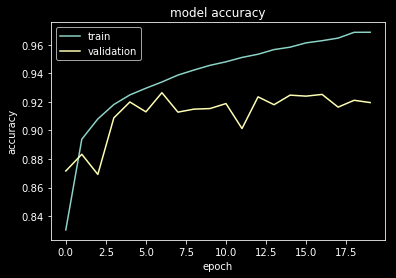

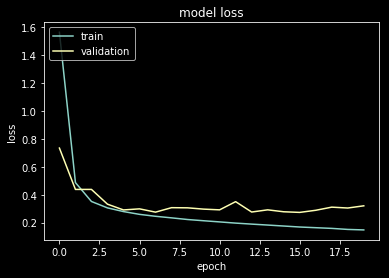

In [10]:
# https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [12]:
'accuracy fluctiated a bt before the 14th epoch but then it started to stablise, ended up with val accuracy higher than previous test with initialisaters only (this one is .9195 and previous exeriment .9184) maybe the way i am combining batch normalisation with initilaisers and other steps is not ideal.' 


'accuracy fluctiated a bt before the 14th epoch but then it started to stablise, ended up with val accuracy higher than previous test with initialisaters only (this one is .9195 and previous exeriment .9184) maybe the way i am combining batch normalisation with initilaisers and other steps is not ideal.'